# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2018

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs and submit one homework assignment per pair. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of a bikeshare dataset (45%). The third one is a self-guided exploration of a dataset on social media and internet attitudes (50%).


## Due Date

This assignment is due at 11:59pm Thursday, February 28th. 


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** (each one is under a bike image) in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

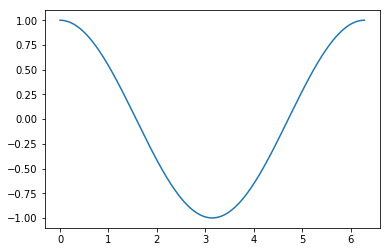

In [2]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

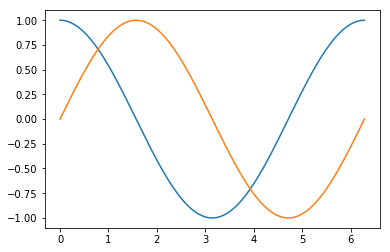

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't publication-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at
https://www.labri.fr/perso/nrougier/teaching/matplotlib to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

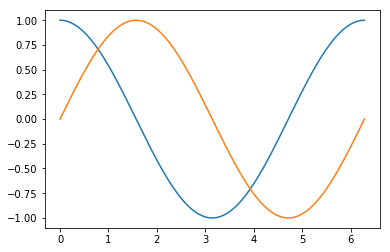

In [4]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

# Part 1: Guided EDA of bikeshare trips (45%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [5]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (9%):

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [6]:
#[your code here]
bike_trips.groupby('season').size()

season
1    4242
2    4409
3    4496
4    4232
dtype: int64

In [7]:
bike_trips.groupby('holiday').size()

holiday
0    16879
1      500
dtype: int64

In [8]:
bike_trips.groupby('workingday').size()

workingday
0     5514
1    11865
dtype: int64

In [9]:
bike_trips.groupby('weathersit').size()

weathersit
1    11413
2     4544
3     1419
4        3
dtype: int64

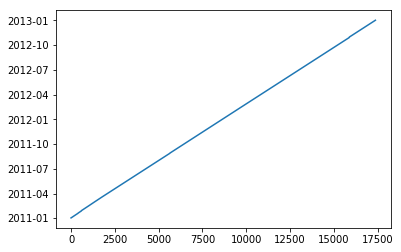

In [10]:
plt.plot(bike_trips['dteday'])

(_Your Q1.1 answer here. Double click to edit_)
Data Granularity: In the bike_trips dataset, each record represents bikeshare data in Washington D.C for every hour of each day from 2011 through 2012 with 17379 records in total.

Time range: 2011-01-01 00:00:00 to 2012-12-31 23:00:00	

Grouping by Seasons, we get the following number of records in:
Spring - 4242 , Summer - 4409, Fall - 4496, Winter - 4232

Grouping by holiday, we get the following number of records in:
False - 16879, True - 500

Grouping by working day or a weekend, we get the following number of records in:
Weekend - 5514, Working day - 11865

Grouping by different weather situations, we get the following number of records in:
Clear or partly cloudy - 11413, Mist + clouds - 4544, Light Snow or Rain - 1419, Heavy Rain or Snow - 3

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

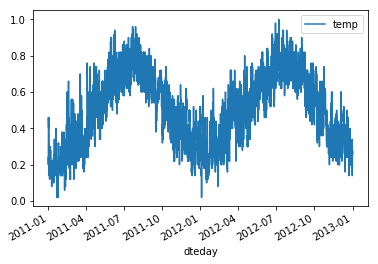

In [11]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

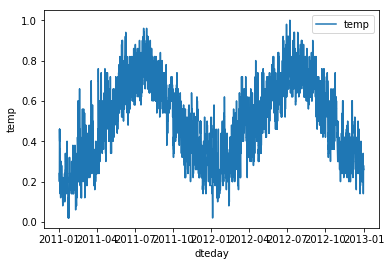

In [12]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
sns.lineplot(x="dteday", y="temp", data=bike_trips,label = 'temp')
plt.legend(loc='upper right')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.2 (9%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

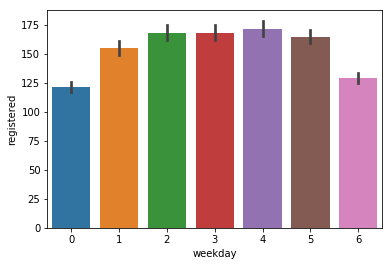

In [25]:
#[your code here]
sns.barplot(x='weekday', y='registered', data=bike_trips)


(Your Q1.2 answer here)
Trends: We observe that the average number of registered riders on Saturday and Sunday is less as compared to the other days of the week.
Possible reason: This is because, I think, the trips shared on weekends will be actually less as it is not a working day and hence, most likely that people would not commute to work.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.3 (9%):

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `distplot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Notice that `seaborn` will fit a curve to the histogram of the data. Fancy!

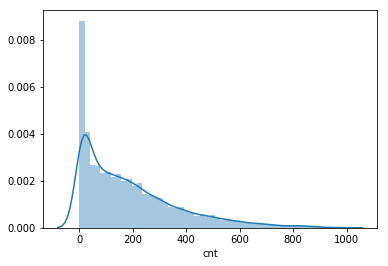

In [14]:
#[your code here]
sns.distplot(bike_trips['cnt'])

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.4 (9%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result should look like:

![](q5.png)

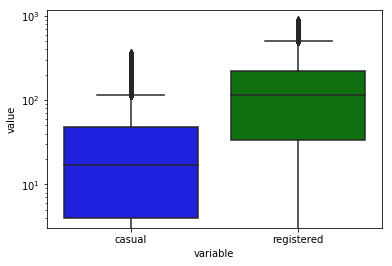

In [15]:
#[your code here]
boxPlot = sns.boxplot(x="variable", y="value",
                      data=pd.melt(bike_trips, id_vars=['cnt'], 
                      value_vars=['casual', 'registered']),
                      palette = {"casual":"b", "registered":"g"})
boxPlot.set_yscale('log')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.5 (9%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lm_plot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q9.png)


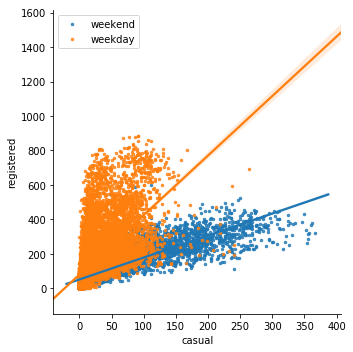

In [16]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

#[your code here]
plot = sns.lmplot(x='casual', y='registered', hue='workingday',data=bike_trips,scatter_kws={'s': 6}, legend= False)
legend_handle = plt.legend(loc='upper left')
legend_handle.get_texts()[0].set_text('weekend')
legend_handle.get_texts()[1].set_text('weekday')

# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.

## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

Here's a great blog post about the differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media and internet attitudes (50%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society. 

_Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_The majority of Instagram, Snapchat and Facebook users visit these social networks daily_" with the following bar plot visualization:

![](example.png)

The survey data that you will analyze was collected by Pew Research. In order to access it, you need to create an account and download it from [here](http://www.pewinternet.org/dataset/jan-3-10-2018-core-trends-survey/) (click on "Download Dataset" in upper right corner). The file you will work with is `January 3-10, 2018 - Core Trends Survey - CSV.csv`. The file that contains information about the meaning of each feature is `January 3-10, 2018 - Core Trends Survey - Questionnaire.docx`.

Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.1 (5%): Initial exploration

Your first step is to load the data from `January 3-10, 2018 - Core Trends Survey - CSV.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 3-10, 2018 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [17]:
#[your code here]
df = pd.read_csv('January 3-10, 2018 - Core Trends Survey - CSV.csv')
#descriptive statistics
df.describe()

,respid,sample,comp,int_date,lang,cregion,state,density,sex,eminuse,...,marital,educ2,emplnw,hisp,racem1,racecmb,inc,party,hh1,weight
count,2002.000000,2002.000000,2002.0,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,...,2002.000000,2002.00000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,76009.782717,1.750250,1.0,180105.636863,1.085415,2.677822,28.155345,3.046454,1.460040,1.139361,...,2.980020,6.24975,3.457043,1.981019,2.101898,2.036464,21.068432,2.706294,3.012987,1.000000
std,43691.053230,0.432977,0.0,2.275502,0.279567,1.014930,16.061673,1.416099,0.498525,0.375485,...,2.260983,11.92625,10.404676,1.073342,2.226236,2.009017,35.128846,1.836563,1.939575,0.484119
min,1.000000,1.000000,1.0,180103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.376175
25%,100004.000000,2.000000,1.0,180104.000000,1.000000,2.000000,12.000000,2.000000,1.000000,1.000000,...,1.000000,3.00000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.630608
50%,100819.000000,2.000000,1.0,180105.000000,1.000000,3.000000,28.000000,3.000000,1.000000,1.000000,...,2.000000,5.00000,2.000000,2.000000,1.000000,1.000000,6.000000,2.000000,2.000000,0.890626
75%,101577.500000,2.000000,1.0,180108.000000,1.000000,3.000000,42.000000,4.000000,2.000000,1.000000,...,5.000000,6.00000,3.000000,2.000000,2.000000,2.000000,9.000000,3.000000,4.000000,1.276018
max,102430.000000,2.000000,1.0,180110.000000,2.000000,4.000000,56.000000,5.000000,2.000000,8.000000,...,9.000000,99.00000,99.000000,9.000000,9.000000,9.000000,99.000000,9.000000,9.000000,2.112972


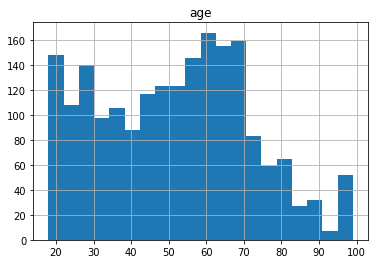

In [18]:
df.hist('age', bins=20)
plt.show()

'We see that the distribution is skewed left suggesting that more number of users have age between 18 to 60 as compared to between 60 and 100'

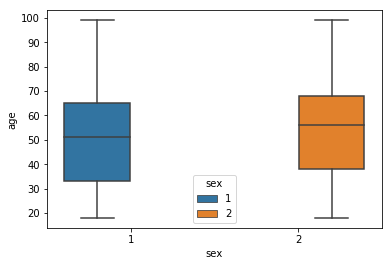

In [19]:
ax = sns.boxplot(x='sex', y='age', hue='sex', data=df)
plt.show()

'This gives sex to age ratio of all the users in this dataset'

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.2 (15%): (_The average Snapchat user is far younger than the average non-user_)

(_We calculate the difference between the average age of users and non-users of different social media platforms and observe that the average user of Snapchat is far younger than the average user of other social media platforms, for example Facebook. 78% of 18- to 24-year-olds are Snapchat users, but that share falls to 54% among those ages 25 to 29_)

In [20]:
# your Q2.2 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]
df.rename(columns={'web1a': 'Twitter', 
                   'web1b': 'Instagram',
                   'web1c': 'Facebook',
                   'web1d': 'Snapchat',
                   'web1e':'YouTube',
                   'web1f': 'WhatsApp',
                   'web1g': 'Pinterest',
                   'web1h': 'LinkedIn',
                   'educ2':'Education',
                   'inc': 'Income',
                  'pial11':'Opinions',
                  'pial5d':'Opinion'}, inplace=True)


In [21]:
df.Facebook.replace(['1','2'],['Yes','No'], inplace=True)
df.Snapchat.replace(['1','2'],['Yes','No'], inplace=True)

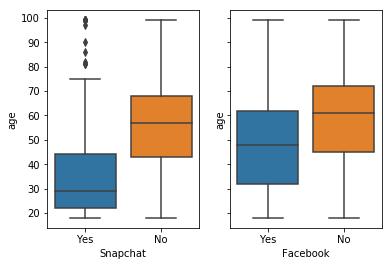

In [22]:
df_snapchat = df[(df['Snapchat'] == 'Yes') | (df['Snapchat']== 'No')]
df_facebook = df[(df['Facebook'] == 'Yes') | (df['Facebook']== 'No')]

fig, axis = plt.subplots(ncols = 2, sharey=True)
sns.boxplot(x='Snapchat', y='age', data=df_snapchat, ax= axis[0])
sns.boxplot(x='Facebook', y='age', data=df_facebook, ax=axis[1])

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.3 (15%): (_The ratio of LinkedIn users to non-users increases with increase in educational level and increase in household income_)

(_The number of users with higher education level are more likely to use LinkedIn. The ratio of non-users to users is more for people with no bachelor degree. LinkedIn remains especially popular among college graduates and those in high-income households. approximately half of Americans with a college degree use LinkedIn, compared with just 9% of those with a high school diploma or less_)

C:\Users\Kruneet\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<Figure size 1440x864 with 0 Axes>

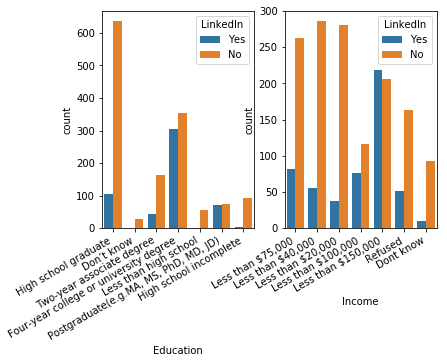

<Figure size 1440x864 with 0 Axes>

In [23]:
# your Q2.3 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]

df.Education.replace([1,2,3,4,5,6,7,8,98,99], ['Less than high school','High school incomplete',
                                           'High school graduate','High school graduate',
                                           'Two-year associate degree',
                                           'Four-year college or university degree','Four-year college or university degree','Postgraduate(e.g.MA, MS, PhD, MD, JD)',
                                          'Don’t know','Don’t know'], inplace=True)

df_facebook.Education.replace([1,2,3,4,5,6,7,8,98,99], ['Less than high school','High school incomplete',
                                           'High school graduate','High school graduate',
                                           'Two-year associate degree',
                                           'Four-year college or university degree','Four-year college or university degree','Postgraduate(e.g.MA, MS, PhD, MD, JD)',
                                          'Don’t know','Don’t know'], inplace=True)
df.LinkedIn.replace(['1','2'],['Yes','No'], inplace=True)
df.Income.replace([1,2,3,4,5,6,7,8,9,98,99], ['Less than $20,000',
                                            'Less than $20,000',
                                           'Less than $40,000',
                                           'Less than $40,000',
                                           'Less than $75,000',
                                           'Less than $75,000',
                                           'Less than $100,000',
                                           'Less than $150,000',
                                              'Less than $150,000',
                                           'Dont know',
                                           'Refused'], inplace=True)
df_LinkedIn = df[(df['LinkedIn']=='Yes') | (df['LinkedIn'] =='No')]
plt.figure(figsize=(20,12))
fig, axis = plt.subplots(ncols = 2)
ax1 = sns.countplot(x='Education', hue=('LinkedIn'),hue_order=["Yes", "No"], data=df_LinkedIn,ax= axis[0])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha="right")
plt.figure(figsize=(20,12))
ax2 = sns.countplot(x='Income', hue=('LinkedIn'),hue_order=["Yes", "No"], data=df_LinkedIn,ax= axis[1])

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha="right")

plt.show()

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.4 (15%): (_Majority of people who use social media says it's hard to quit using it._)

(_Mostly younger people who use social media think it's difficult to quit using social media._)

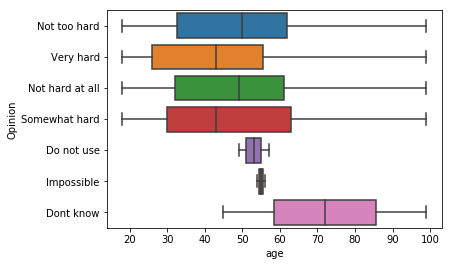

In [24]:
# your Q2.4 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf
#[your code here]

df.Opinion.replace(['1','2','3','4','5','6','8','9'],['Very hard','Somewhat hard', 
                                                          'Not too hard', 'Not hard at all',
                                                          'Impossible','Do not use','Dont know','Refused'], inplace=True)
df_social_media_users = df[df['snsint2']==1]
df_social_media_users['Opinion']
sns.boxplot(y=df_social_media_users.Opinion,x=df_social_media_users.age)


# Extra Credit (20%)

The best 10 visualizations and insights from Questions 2.2 to 2.4 will get an extra 20% credit (at most one visualization can be considered per submission). There is nothing you need to do for the extra credit except to do your best in the last three questions. We will showcase the best visualizations in class! 

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!